<a href="https://colab.research.google.com/github/quotation3/DB_Finance/blob/main/Sentiment_Lexicon/10_%EC%8B%9C%EA%B0%81%ED%99%94_only_topic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 시계열 그래프

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.dates as dates
import matplotlib as mpl

In [ ]:
result = pd.read_csv('/content/drive/MyDrive/DB_Finance/data/lg_chemical_final_only_topic.csv')

In [ ]:
result = result[['date','tone','change']]
result

,date,tone,change
0,2017-01-02,-0.082234,-3.07
1,2017-01-03,0.258993,3.56
2,2017-01-04,0.265116,2.48
3,2017-01-05,0.163505,-0.37
4,2017-01-06,0.258348,-0.56
...,...,...,...
728,2019-12-23,0.129825,-0.48
729,2019-12-24,0.174767,-0.16
730,2019-12-26,0.151986,-1.44
731,2019-12-27,0.111372,0.81


In [ ]:
result = result.astype({'tone': 'float'})
result["date"] = pd.to_datetime(result['date'])

In [ ]:
result.corr()

,tone,change
tone,1.000000,0.529069
change,0.529069,1.000000


In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


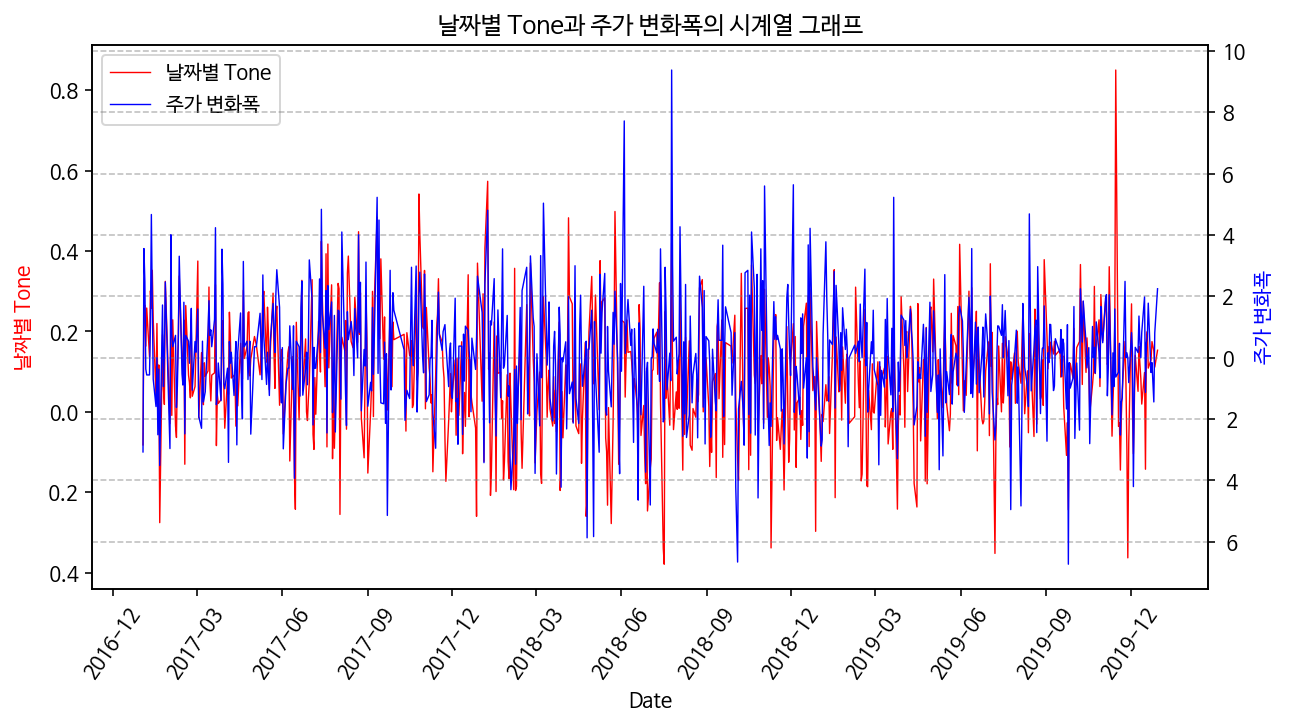

In [ ]:

x = result['date']
y1 = result['tone']
y2 = result['change']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
line1 = ax1.plot(x, y1, 'r-', label = '날짜별 Tone', linewidth=0.7)
line2 = ax2.plot(x, y2, 'b-', label = '주가 변화폭', linewidth=0.7)

ax1.set_xlabel('Date')
ax1.set_ylabel('날짜별 Tone', color='r')
ax2.set_ylabel('주가 변화폭', color='b')

lns = line1+line2   # line 범례 작성
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0)


# # x축 편집
plt.setp(ax1.get_xticklabels(), rotation=55)    # x축 45도 회전
loc = mdates.MonthLocator([3,6,9,12])  # x축 레이블 매년 1월만 표시
myFmt = mdates.DateFormatter('%Y-%m')   # x축 레이블 포맷 설정
ax1.xaxis.set_major_formatter(myFmt)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax1.xaxis.set_major_locator(loc)

plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')   # x축 grid 표시
plt.title('날짜별 Tone과 주가 변화폭의 시계열 그래프')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.savefig('/content/drive/MyDrive/DB_Finance/data/시계열_2.png')
plt.show()
#plt.savefig('/content/drive/MyDrive/data/DB_Finance/data/시계열.png')

### 워드클라우드

In [ ]:
pip install wordcloud

In [ ]:
text = pd.read_csv('/content/drive/MyDrive/DB_Finance/data/data_for_word_cloud.csv')

In [ ]:
for i in range(len(text)):
    text['nouns'][i] = text['nouns'][i].replace('[','').replace(']','').replace("'",'').replace(' ','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
text

,date,nouns,label
0,2017-01-02,"한국,배터리,보조금,제외,화학,삼성,날벼락,한국,배터리,보조금,제외,화학,삼성,날벼...",0
1,2017-01-02,"리더십,시대,분석,산업,혁명,리더,경영인,누굴까,리더십,시대,년,분석,산업,혁명,리...",0
2,2017-01-02,"구본무,회장,창립,올해,시작,구본무,회장,창립,올해,시작,회장,그룹,신년사,사업,구...",0
3,2017-01-02,"한국,배터리,설,자리,장착,차량,보조금,제외,국산,배터리,설,자리,장착,차량,보조금...",0
4,2017-01-02,"충전,시간,사용,노트북,시판,충전,시간,사용,노트북,시판,동아일보,전자,충전,최대,...",0
...,...,...,...
2878,2019-12-30,"화학,놀이터,화학,캠프,과학,교육,기부,화학,놀이터,화학,캠프,과학,교육,기부,사회...",1
2879,2019-12-30,"배터리,시가총액,돌파,배터리,시가총액,돌파,세계,최대,배터리,제조사,중국,주가,전기...",1
2880,2019-12-30,"전자,폴란드,브로츠와프,배터리,분리,공장,증설,전자,폴란드,브로츠와프,배터리,분리,...",1
2881,2019-12-30,"결산,산업,소송,화재,다사다난,배터리,업계,결산,산업,소송,화재,다사다난,배터리,업...",1


In [ ]:
text_posi = text[text['label']==1]
text_posi.reset_index(inplace=True, drop='True')

In [ ]:
text_nega = text[text['label']==0]
text_nega.reset_index(inplace=True, drop='True')

In [ ]:
text_posi

,date,nouns,label
0,2017-01-03,"가전,주인공,미래,가전,쇼,주인공,미래,년,국제,전자,제품,박람회,이상,전자,제품,...",1
1,2017-01-03,"두산,밥캣,소재,종속,회사,흡수,합병,두산,밥캣,소재,종속,회사,흡수,합병,서울,뉴...",1
2,2017-01-03,"쓰리,이준,한윤석,사내,이사,혐의,결론,한신공영,자회사,파크,개발,채무,원,담보,제...",1
3,2017-01-03,"전방,사드,보복,전기차,배터리,항공,직격탄,전방,사드,보복,전기차,배터리,항공,직격탄",1
4,2017-01-03,"에너지,리더,강남훈,에너지,공단,이사장,기후,변화,대응,기회,에너지,산업,시장,개척...",1
...,...,...,...
1430,2019-12-30,"화학,놀이터,화학,캠프,과학,교육,기부,화학,놀이터,화학,캠프,과학,교육,기부,사회...",1
1431,2019-12-30,"배터리,시가총액,돌파,배터리,시가총액,돌파,세계,최대,배터리,제조사,중국,주가,전기...",1
1432,2019-12-30,"전자,폴란드,브로츠와프,배터리,분리,공장,증설,전자,폴란드,브로츠와프,배터리,분리,...",1
1433,2019-12-30,"결산,산업,소송,화재,다사다난,배터리,업계,결산,산업,소송,화재,다사다난,배터리,업...",1


In [ ]:
text_nega

,date,nouns,label
0,2017-01-02,"한국,배터리,보조금,제외,화학,삼성,날벼락,한국,배터리,보조금,제외,화학,삼성,날벼...",0
1,2017-01-02,"리더십,시대,분석,산업,혁명,리더,경영인,누굴까,리더십,시대,년,분석,산업,혁명,리...",0
2,2017-01-02,"구본무,회장,창립,올해,시작,구본무,회장,창립,올해,시작,회장,그룹,신년사,사업,구...",0
3,2017-01-02,"한국,배터리,설,자리,장착,차량,보조금,제외,국산,배터리,설,자리,장착,차량,보조금...",0
4,2017-01-02,"충전,시간,사용,노트북,시판,충전,시간,사용,노트북,시판,동아일보,전자,충전,최대,...",0
...,...,...,...
1443,2019-12-04,"화학,배터리,소송,관련,핵심,고객,폴크스,바겐,갈등,화학,배터리,소송,관련,핵심,고...",0
1444,2019-12-04,"기존,연봉,한국,고급,인력,중국,기존,연봉,한국,고급,인력,중국,중국,배터리,반도체...",0
1445,2019-12-04,"화학,배터리,소송,관련,핵심,고객,폭스바겐,갈등,화학,배터리,소송,관련,핵심,고객,...",0
1446,2019-12-04,"그룹,형제,승계,막내,허태수,신임,회장,체제,그룹,형제,승계,막내,허태수,신임,회장...",0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
word = ''
for i in range(len(text_posi)):
    word+=text_posi['nouns'][i]

In [ ]:
word = word.split(',')

In [ ]:
word = [i for i in word if len(i)!=1]

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#stopword=set('기업','때문','대표','이사','경우')
stopwords = set(STOPWORDS)

stopwords.update(['기업','때문','대표','이사','경우','영업','이익' ,'이상' ,'관련','업계','지난해','올해','최근','국내'])
word = [each_word for each_word in word if each_word not in stopwords]

In [ ]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
               background_color='white',
               #stopwords = stopwords,
               width=1000,
               height=1000,
               max_words = 100,
               max_font_size = 300)



In [ ]:
cloud = wc.generate(str(word))

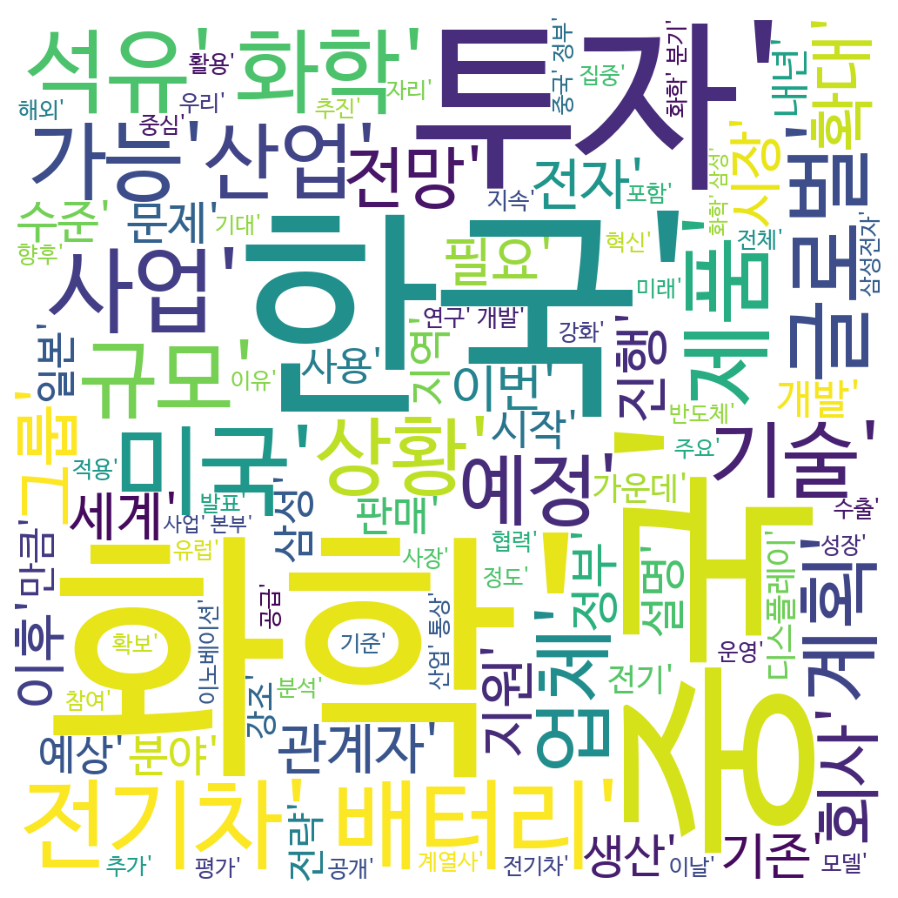

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.savefig('/content/drive/MyDrive/DB_Finance/data/wordcloud_positive.png')
plt.show()

In [ ]:
word = ''
for i in range(len(text_nega)):
    word+=text_nega['nouns'][i]

In [ ]:
word = word.split(',')

In [ ]:
word = [i for i in word if len(i)!=1]

In [ ]:
stopwords = set(STOPWORDS)

stopwords.update(['기업','때문','대표','이사','경우','영업','이익' ,'이상' ,'관련','업계','지난해','올해','최근','국내'])
word = [each_word for each_word in word if each_word not in stopwords]

In [ ]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
               background_color='white',
               #stopwords = stopwords,
               width=1000,
               height=1000,
               max_words = 100,
               max_font_size = 300)


In [ ]:
cloud = wc.generate(str(word))

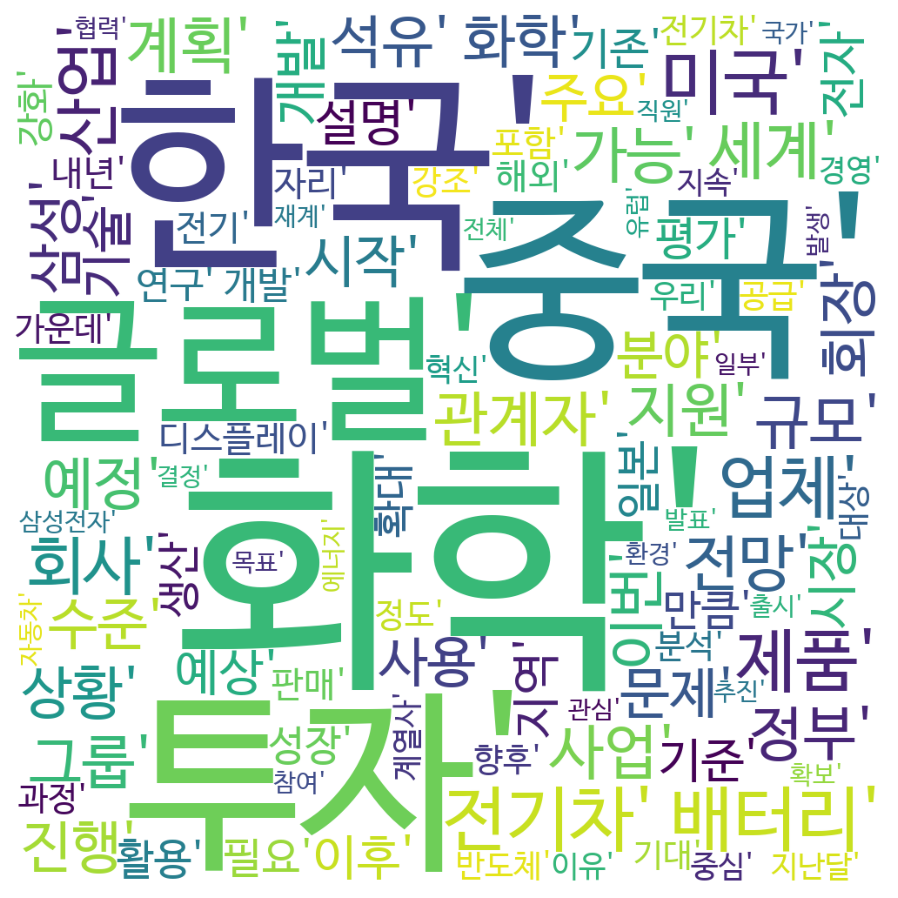

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.savefig('/content/drive/MyDrive/DB_Finance/data/wordcloud_negative.png')
plt.show()